<a href="https://colab.research.google.com/github/georgsmeinung/rn1-perceptron/blob/main/RN-Clase01/RN-PERCEPTRON_AND_enClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
from IPython import display

import grafica as gr

# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

### Ejemplos de la función AND

In [ ]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], [0,1],[1,0],[1,1]])

#-- Respuesta esperada para cada ejemplo
T = np.array([0,0,0,1])

In [ ]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

### Prueba de dibujo

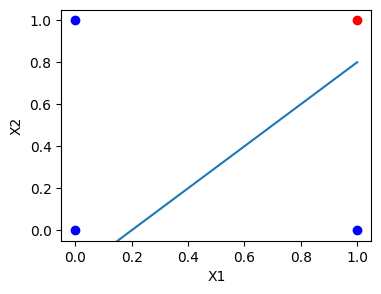

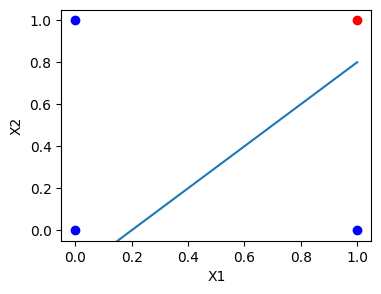

In [ ]:
# -- PESOS INICIALES - Determinan la ubicación de la recta
W = np.array([-1.0, 1.0])
b = 0.2

res= gr.dibuPtosRecta(X,T, W, b, ['X1','X2'])

### Hiperparámetros del perceptrón

In [ ]:
MAX_ITE = 500
alfa = 0.01

### Entrenamiento del perceptrón

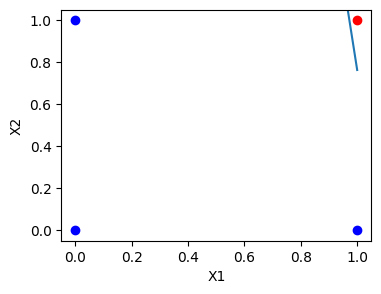

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

In [ ]:
import time

plt.clf()
nIn = X.shape[1]  # cantidad de atributos
nEj = X.shape[0]  # cantidad de ejemplos

#--- Los pesos iniciales son aleatorios
W = np.array(np.random.uniform(-0.5, 0.5, size=nIn))
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

# --- titulos y ph se utilizan sólo para dibujar ---
titulos = ['X1', 'X2']
ph = 0  # es el manejador de la recta en el dibujo

# ----------- Inicia el entrenamiento -----------
#-- Repetir hasta que todos los ejemplos estén bien clasificados
#   o hasta que se hayan realizado MAX_ITE iteraciones

for i in range(MAX_ITE):
    cambios = 0
    # Para cada ejemplo
    for j in range(nEj):
        #calcular la salida del perceptrón
        Y = 1 if np.dot(X[j], W) + b > 0 else 0

        #corregir W si corresponde usando el vector proyección
        if Y != T[j]:
            cambios += 1
            W = W + alfa * (T[j] - Y) * X[j]
            b = b + alfa * (T[j] - Y)

    errores.append(cambios)

    # dibujar la recta
    res = gr.dibuPtosRecta(X, T, W, b, titulos, ph)
    plt.clf() # Clear the current figure
    display.display(plt.gcf())
    time.sleep(.2)
    if cambios == 0:
        break

### Pesos obtenidos luego del entrenamiento

In [ ]:
print("W = ", W)
print("b = ", b)

W =  [0.12822627 0.01496857]
b =  -0.13964802086225958


### Cantidad de errores por iteración

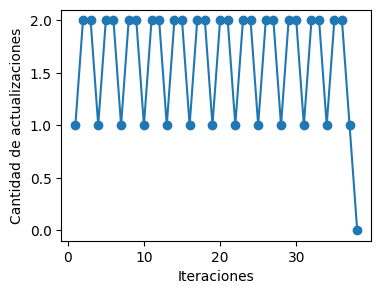

In [ ]:
plt.clf()
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()